In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline  

In [2]:
from mpl_toolkits.basemap import Basemap

/home/yewenhe0904/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


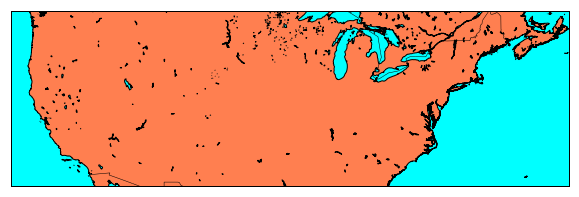

In [10]:
plt.figure(figsize=(10,10))
map=Basemap(projection='merc',resolution='h',area_thresh=0.1,
           llcrnrlon=-126.619875,llcrnrlat=31.354158,urcrnrlon=-59.647219,urcrnrlat=47.517613)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='coral',lake_color='aqua')
map.drawmapboundary(fill_color='aqua')
plt.show()

In [25]:
from mpl_toolkits.basemap import *
print(Proj)

<class 'mpl_toolkits.basemap.proj.Proj'>


In [26]:
projection_params

{'aea': 'lon_0,lat_0,lat_1',
 'aeqd': 'lon_0,lat_0',
 'cass': 'lon_0,lat_0',
 'cea': 'corners only plus lat_ts (no width/height)',
 'cyl': 'corners only (no width/height)',
 'eck4': 'lon_0,lat_0,no corners or width/height',
 'eqdc': 'lon_0,lat_0,lat_1,lat_2',
 'gall': 'corners only (no width/height)',
 'geos': 'lon_0,satellite_height,llcrnrx,llcrnry,urcrnrx,urcrnry,no width/height',
 'gnom': 'lon_0,lat_0',
 'hammer': 'lon_0,lat_0,no corners or width/height',
 'kav7': 'lon_0,lat_0,no corners or width/height',
 'laea': 'lon_0,lat_0',
 'lcc': 'lon_0,lat_0,lat_1,lat_2,k_0',
 'mbtfpq': 'lon_0,lat_0,no corners or width/height',
 'merc': 'corners plus lat_ts (no width/height)',
 'mill': 'corners only (no width/height)',
 'moll': 'lon_0,lat_0,no corners or width/height',
 'npaeqd': 'bounding_lat,lon_0,lat_0,no corners or width/height',
 'nplaea': 'bounding_lat,lon_0,lat_0,no corners or width/height',
 'npstere': 'bounding_lat,lon_0,lat_0,no corners or width/height',
 'nsper': 'lon_0,satellite_

plot chicago crime data

In [4]:
data=pd.read_csv('files/Chicago_Crimes_2012_to_2017.csv')

In [6]:
data.count()

Unnamed: 0              1456714
ID                      1456714
Case Number             1456713
Date                    1456714
Block                   1456714
IUCR                    1456714
Primary Type            1456714
Description             1456714
Location Description    1455056
Arrest                  1456714
Domestic                1456714
Beat                    1456714
District                1456713
Ward                    1456700
Community Area          1456674
FBI Code                1456714
X Coordinate            1419631
Y Coordinate            1419631
Year                    1456714
Updated On              1456714
Latitude                1419631
Longitude               1419631
Location                1419631
dtype: int64

In [114]:


def chicago_Map(ax=None,lllat=41.6,lllon=-88.00,urlat=42.05,urlon=-87.5):
    plt.figure(figsize=(20,20))
    map=Basemap(ax=ax,projection='stere',resolution='f',lon_0=(urlon+lllon)/2,lat_0=(urlat+lllat)/2,
               llcrnrlon=lllon,llcrnrlat=lllat,urcrnrlon=urlon,urcrnrlat=urlat)
    map.drawcoastlines()
    map.drawcountries()
    map.drawstates()
    map.drawrivers()
    map.fillcontinents(color='coral',lake_color='aqua')
    return map
#



In [118]:
data=data[['Primary Type','Arrest','Latitude','Longitude']]
data.head()

s_data=data.sample(n=5000)
s_data.head()

,Primary Type,Arrest,Latitude,Longitude
210900,ROBBERY,False,41.780029,-87.627204
1417114,THEFT,False,41.866100,-87.660016
499365,THEFT,False,41.978161,-87.658818
573460,NARCOTICS,True,41.875040,-87.743690
1114635,NARCOTICS,True,41.880456,-87.748333


/home/yewenhe0904/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/yewenhe0904/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/yewenhe0904/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


(16065,
 3,
 [-87.93208233538816, 41.644584027887554, 0.0, 0.0],
 [-87.52445762784836, 42.023031137113186, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x7efd1a008550>)

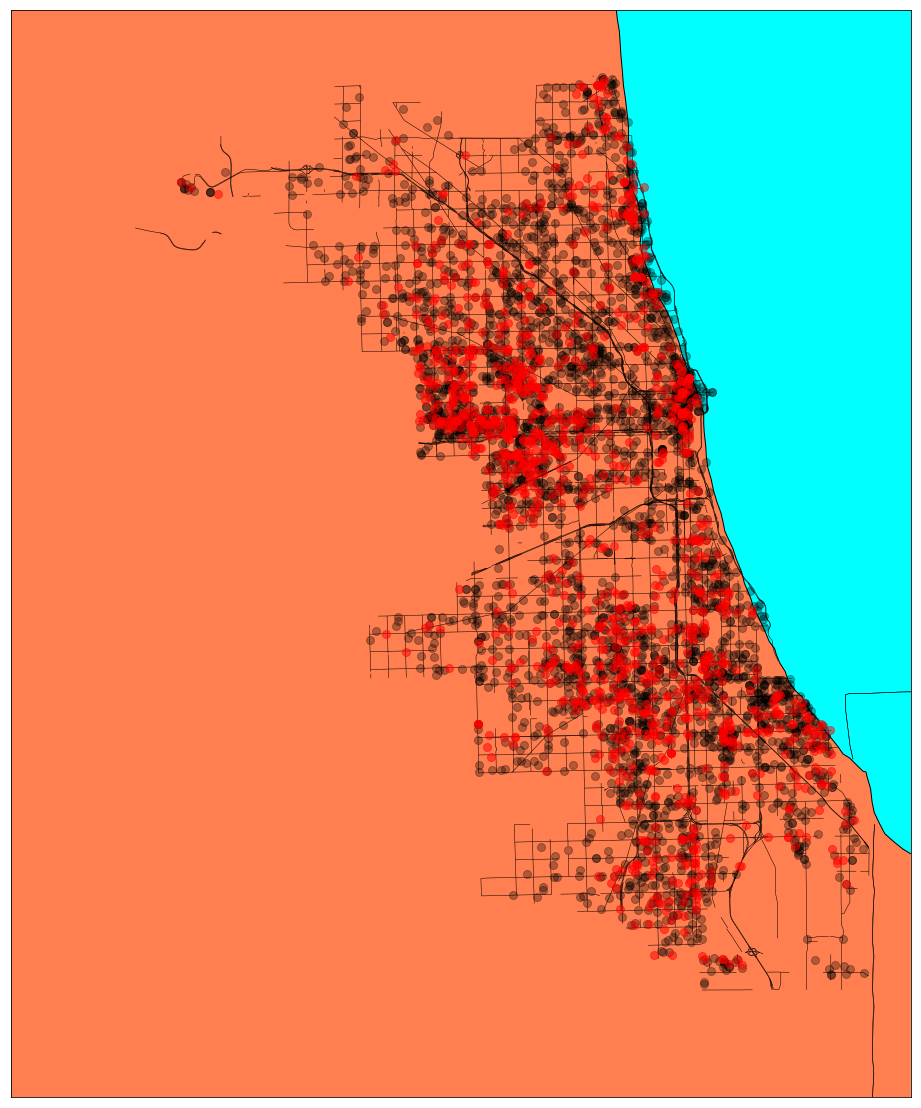

In [119]:
map=chicago_Map()
s_data_a=s_data[s_data['Arrest']]
s_data_b=s_data[s_data['Arrest']==False]
x,y=map(list(s_data_b.Longitude),list(s_data_b.Latitude))
map.plot(x,y,'k.',alpha=0.3,markersize=16)
x,y=map(list(s_data_a.Longitude),list(s_data_a.Latitude))
map.plot(x,y,'r.',alpha=0.5,markersize=16)

map.readshapefile('files/chicago/chicago_street','streets')